In [6]:
import requests , json
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#Gotta catch 'em all
##--- Pokemon API
habitats_response = requests.get('https://pokeapi.co/api/v2/pokemon')


Text(0.5, 1.0, 'Kantos Pokemon Habitats')

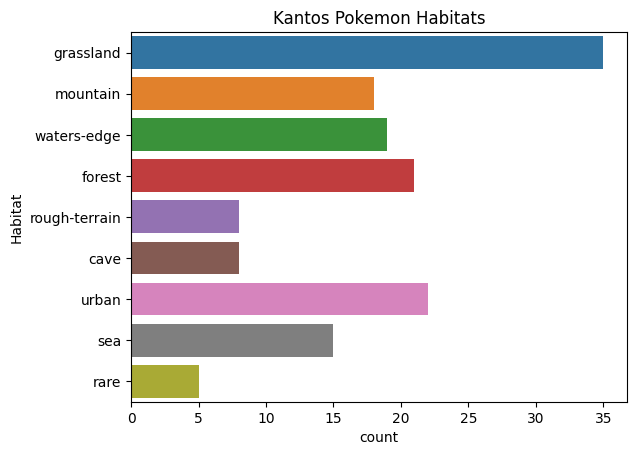

In [7]:
df = pd.read_csv("kantos-pokemon.csv")
sb.countplot(data = df , y ='Habitat')
plt.title("Kantos Pokemon Habitats")

Text(0.5, 1.0, 'Kantos Pokemon Type')

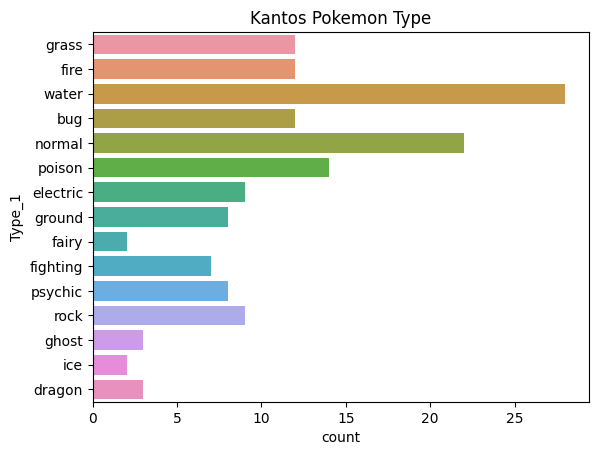

In [8]:
df = pd.read_csv("kantos-pokemon.csv")
sb.countplot(data = df , y ='Type_1')
plt.title("Kantos Pokemon Type")

Text(0.5, 1.0, 'Kantos Pokemon 2nd Type')

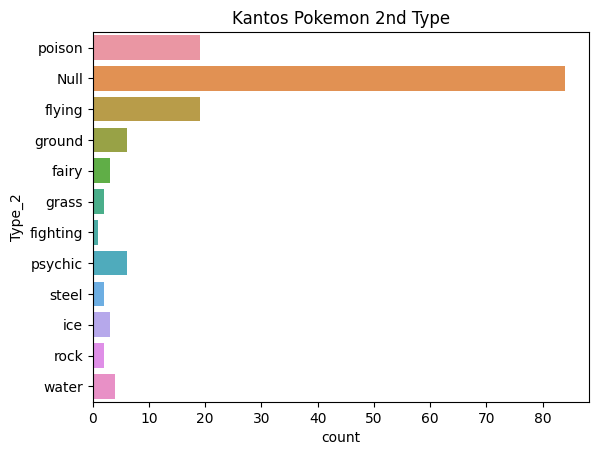

In [9]:
df = pd.read_csv("kantos-pokemon.csv")
sb.countplot(data = df , y ='Type_2')
plt.title("Kantos Pokemon 2nd Type")


C:\Users\kianr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


'Attack / Health stats for Pokemon:'

'First Evolution Pokemon,  count -> 79, mean -> 1.307, std -> 0.723'

'Second Evolution Pokemon, count -> 56, mean -> 1.214, std -> 0.445'

'Third Evolution Pokemon,  count -> 16, mean -> 1.149, std -> 0.213'

TtestResult(statistic=0.8409890599010387, pvalue=0.40186352208155807, df=133.0)

TtestResult(statistic=0.8584101277017898, pvalue=0.3928730511839761, df=93.0)

TtestResult(statistic=0.5663883386519553, pvalue=0.5729413176751591, df=70.0)

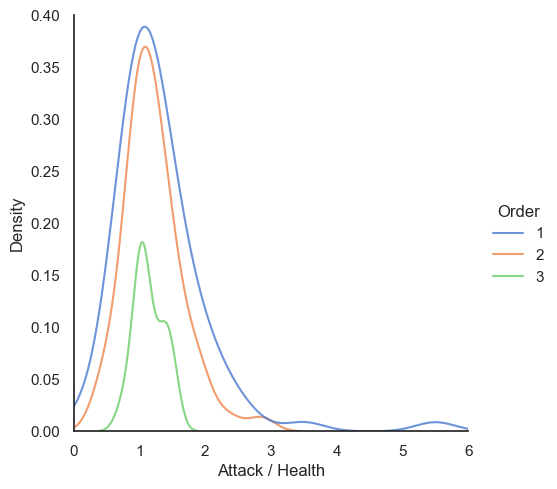

In [10]:
import requests , json
import pandas as pd
import seaborn as sns
import statistics as stat
from scipy import stats

# read in pokemon.csv as data frame for analysis 
pokemon = pd.read_csv('pokemon.csv')

# create new column 
pokemon['Attack_Ratio'] = pokemon.Attack / pokemon.Health

# create plot 
sns.set_theme(style="white")
plot = sns.displot(data=pokemon, x="Attack_Ratio", hue="Order", kind="kde", alpha=.8, palette="muted", common_norm=True).set(xlim=(0,6),ylim=(0,0.4))
plot.set(xlabel='Attack / Health', ylabel='Density')

# find mean and standard deviations for each evolution level
levels = [item for item in pokemon.Order]
ratio = [item for item in pokemon.Attack_Ratio]
ones = []
twos = []
threes = []

for i in range(len(levels)):
    if (levels[i] == 1):
        ones.append(ratio[i])
    if (levels[i] == 2):
        twos.append(ratio[i])
    if (levels[i] == 3):
        threes.append(ratio[i])

mean_ones = sum(ones) / len(ones)
mean_twos = sum(twos) / len(twos)
mean_threes = sum(threes) / len(threes)

display('Attack / Health stats for Pokemon:')
display(f'First Evolution Pokemon,  count -> {len(ones)}, mean -> {round(mean_ones, 3)}, std -> {round(stat.pstdev(ones), 3)}')
display(f'Second Evolution Pokemon, count -> {len(twos)}, mean -> {round(mean_twos, 3)}, std -> {round(stat.pstdev(twos), 3)}')
display(f'Third Evolution Pokemon,  count -> {len(threes)}, mean -> {round(mean_threes, 3)}, std -> {round(stat.pstdev(threes), 3)}')

# perform t tests 
display(stats.ttest_ind(pokemon[pokemon.Order == 1].Attack_Ratio, pokemon[pokemon.Order == 2].Attack_Ratio))
display(stats.ttest_ind(pokemon[pokemon.Order == 1].Attack_Ratio, pokemon[pokemon.Order == 3].Attack_Ratio))
display(stats.ttest_ind(pokemon[pokemon.Order == 2].Attack_Ratio, pokemon[pokemon.Order == 3].Attack_Ratio))